# Insertion algorithm 

In [1]:
%matplotlib inline

import torch
import numpy as np
import signatory
import math

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from insertion import Insertion, get_A_matrix, solve_optimization_problem,invert_signature
from tools import get_signature_as_tensor


In [2]:
test_tensor = torch.rand((3,3,3))
print(test_tensor[0,1,2])

tensor(0.4366)


## Insertion operator 

In [3]:
test_path = torch.rand((1,10,5))
signature_test = signatory.signature(test_path, 2)
get_signature_as_tensor(signature_test,5,2)

{'Depth 1': tensor([-0.5264, -0.1974,  0.4373,  0.1501,  0.0898]),
 'Depth 2': tensor([[ 0.1386,  0.0043,  0.0114, -0.0120, -0.1043],
         [ 0.0996,  0.0195, -0.2030, -0.2768, -0.1498],
         [-0.2416,  0.1167,  0.0956,  0.1701,  0.2572],
         [-0.0670,  0.2472, -0.1044,  0.0113,  0.2621],
         [ 0.0570,  0.1321, -0.2179, -0.2486,  0.0040]])}

In [4]:
x=[1,2,3,4,5]

p=3

n=2

dimension=5

Insertion(p,n,x,signature_test,dimension)

tensor([[[ 0.2771,  0.5543,  0.8314,  1.1086,  1.3857],
         [ 0.0086,  0.0173,  0.0259,  0.0346,  0.0432],
         [ 0.0227,  0.0454,  0.0682,  0.0909,  0.1136],
         [-0.0240, -0.0480, -0.0719, -0.0959, -0.1199],
         [-0.2086, -0.4172, -0.6257, -0.8343, -1.0429]],

        [[ 0.1992,  0.3984,  0.5975,  0.7967,  0.9959],
         [ 0.0390,  0.0779,  0.1169,  0.1558,  0.1948],
         [-0.4060, -0.8120, -1.2180, -1.6240, -2.0300],
         [-0.5536, -1.1071, -1.6607, -2.2142, -2.7678],
         [-0.2996, -0.5991, -0.8987, -1.1983, -1.4978]],

        [[-0.4831, -0.9663, -1.4494, -1.9325, -2.4157],
         [ 0.2334,  0.4667,  0.7001,  0.9335,  1.1669],
         [ 0.1912,  0.3824,  0.5737,  0.7649,  0.9561],
         [ 0.3402,  0.6803,  1.0205,  1.3606,  1.7008],
         [ 0.5144,  1.0288,  1.5433,  2.0577,  2.5721]],

        [[-0.1341, -0.2681, -0.4022, -0.5362, -0.6703],
         [ 0.4943,  0.9886,  1.4829,  1.9772,  2.4715],
         [-0.2089, -0.4178, -0.6266, -0.83

In [5]:
dimension=4
test_path = torch.rand((1,10,dimension))
n=3
signature_test = signatory.signature(test_path, n)
last_signature_term = get_signature_as_tensor(signature_test,dimension,n)["Depth "+ str(n)]
p=3

# Test if A has the right structure: A^TA should be diagonal with same values in the diagonal.
A_matrix=get_A_matrix(p,signature_test,n,dimension)
print(np.matmul(np.transpose(A_matrix),A_matrix))

tensor([[12.4774,  0.0000,  0.0000,  0.0000],
        [ 0.0000, 12.4774,  0.0000,  0.0000],
        [ 0.0000,  0.0000, 12.4774,  0.0000],
        [ 0.0000,  0.0000,  0.0000, 12.4774]], dtype=torch.float64)


In [6]:
signature = signatory.signature(test_path, 2)
signature_next = signatory.signature(test_path,3)

solve_optimization_problem(signature, signature_next,p=2,n=2,dimension=2)

Elapsed time for getting A 0.002074718475341797
Elapsed time for svd 8.916854858398438e-05


array([0.98000198, 0.19898774])

## Tests

### Tests on semi-circle 

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


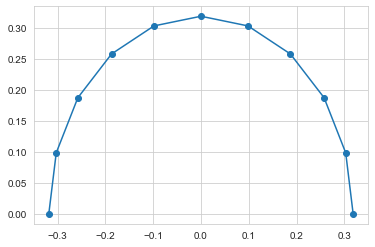

In [7]:
points = np.arange(0,1.1,0.1)

print(points)

x1 = 1/(math.pi)*np.cos(math.pi*points)

x2 = 1/(math.pi)*np.sin(math.pi*points)

sns.set_style('whitegrid')

plt.plot(x1,x2,linestyle='-',marker='o')
plt.show()

Elapsed time for getting A 0.01708388328552246
Elapsed time for svd 8.821487426757812e-05
Elapsed time for getting A 0.004425048828125
Elapsed time for svd 0.00010013580322265625
Elapsed time for getting A 0.0033462047576904297
Elapsed time for svd 7.295608520507812e-05
Elapsed time for getting A 0.006808280944824219
Elapsed time for svd 0.00010323524475097656
Elapsed time for getting A 0.003072023391723633
Elapsed time for svd 5.507469177246094e-05


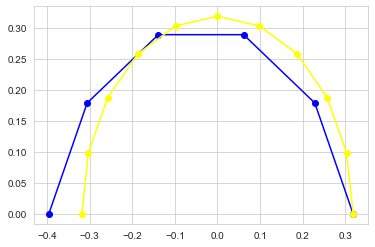

In [8]:
path = torch.tensor(np.array((x1,x2)).T)
n=4

signature = signatory.signature(path.unsqueeze(0), n+1)

reconstructed_path=invert_signature(signature,n,path[0,:],2)
plt.plot(reconstructed_path[:,0],reconstructed_path[:,1],c='blue',marker='o')
plt.plot(path[:,0],path[:,1],linestyle='-',marker='o',c='yellow')
plt.show()

    

## Pendigits example

In [9]:
from platform import python_version

print(python_version())

3.8.3


In [10]:
from get_data import get_pendigits

X,y=get_pendigits()

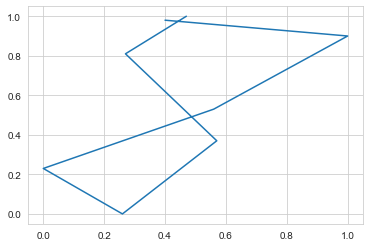

In [11]:
path=torch.tensor(X[0,:,:])/100

plt.plot(path[:,0],path[:,1])

torch.Size([8, 2])
Elapsed time for getting A 1.0010027885437012
Elapsed time for svd 1.723707914352417
Elapsed time for getting A 0.9734029769897461
Elapsed time for svd 1.485705852508545
Elapsed time for getting A 0.9264781475067139
Elapsed time for svd 1.4022982120513916
Elapsed time for getting A 0.9298171997070312
Elapsed time for svd 1.4165480136871338
Elapsed time for getting A 0.9289910793304443
Elapsed time for svd 1.4650356769561768
Elapsed time for getting A 0.9126219749450684
Elapsed time for svd 1.4112439155578613
Elapsed time for getting A 0.9193017482757568
Elapsed time for svd 1.425126075744629
Elapsed time for getting A 0.9107599258422852
Elapsed time for svd 1.4190828800201416
Elapsed time for getting A 0.914740800857544
Elapsed time for svd 1.4108920097351074
Elapsed time for getting A 1.0407779216766357
Elapsed time for svd 1.5498318672180176
Elapsed time for getting A 0.9249060153961182
Elapsed time for svd 1.447953224182129
Elapsed time for getting A 0.93287515640

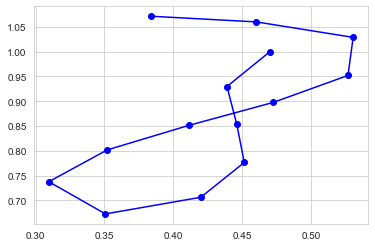

Elapsed time for signature
0.003838777542114258
Elapsed time for inversion
31.906182765960693


In [12]:
import time

n=12
print(path.shape)

t1 = time.time()
signature = signatory.signature(path.unsqueeze(0), n+1)
t2 = time.time() - t1

t3 = time.time()
reconstructed_path=invert_signature(signature,n,path[0,:],2)
t4 = time.time() - t3

plt.plot(reconstructed_path[:,0],reconstructed_path[:,1],c='blue',marker='o')
#plt.plot(path[:,0],path[:,1],linestyle='-',marker='o',c='yellow')
plt.show()

print('Elapsed time for signature')
print(t2)
print('Elapsed time for inversion')
print(t4)